In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
import sys
sys.path.insert(0,'/home/cbleker/research/NIB/squad/BoolDoG')
import booldog

In [3]:
bnet = '''
CYCD31, !SCF
SCF,  !APCC & ((E2Fb & (!RBR | (!KRP1 & CYCD31))) | MYB3R14)
RBR,  (KRP1 | !CYCD31) & ((E2Fa & !RBR) | MYB3R14)
E2Fa,  (E2Fa | !E2Fc) & !(CDKB11 & CYCA23)
E2Fb,  (E2Fa & !RBR)
E2Fc,  !(SCF & !KRP1 & CYCD31) & ((E2Fa & !RBR) | MYB3R14)
E2Fe,  (!E2Fc | (E2Fb & (!RBR | (!KRP1 & CYCD31)))) | MYB77
MYB77,  E2Fb & (!RBR | (!KRP1 & CYCD31))
MYB3R14,  MYB77 | (MYB3R14 & CYCB11 & !KRP1)
CYCB11,  !APCC & (MYB3R14 | MYB77 | ((!RBR | (!KRP1 & CYCD31)) & E2Fb & !E2Fc))
CDKB11,  ((!RBR | (!KRP1 & CYCD31)) & E2Fb & !E2Fc) | MYB3R14 | MYB77
CYCA23,  !APCC & (MYB3R14 | MYB77)
KRP1,  (MYB77 | MYB3R14) & !(CDKB11 & CYCA23 & SCF)
APCC,  !E2Fe & ((E2Fa & !RBR) | MYB3R14 | MYB77)'''

B = booldog.RegulatoryNetwork(bnet, data_format='bnet')

Imported Boolean graph with 14 nodes


In [4]:
initial_state = {
    'APCC':1,
    'KRP1':0,
    'CYCA23':0,
    'CDKB11':1,
    'CYCB11':0,
    'MYB3R14':1,
    'MYB77':0,
    'E2Fe':0,
    'E2Fc':1,
    'E2Fb':0,
    'E2Fa':0,
    'RBR':1,
    'SCF':0,
    'CYCD31':0
}

Saved figure to aradopcc.png. 


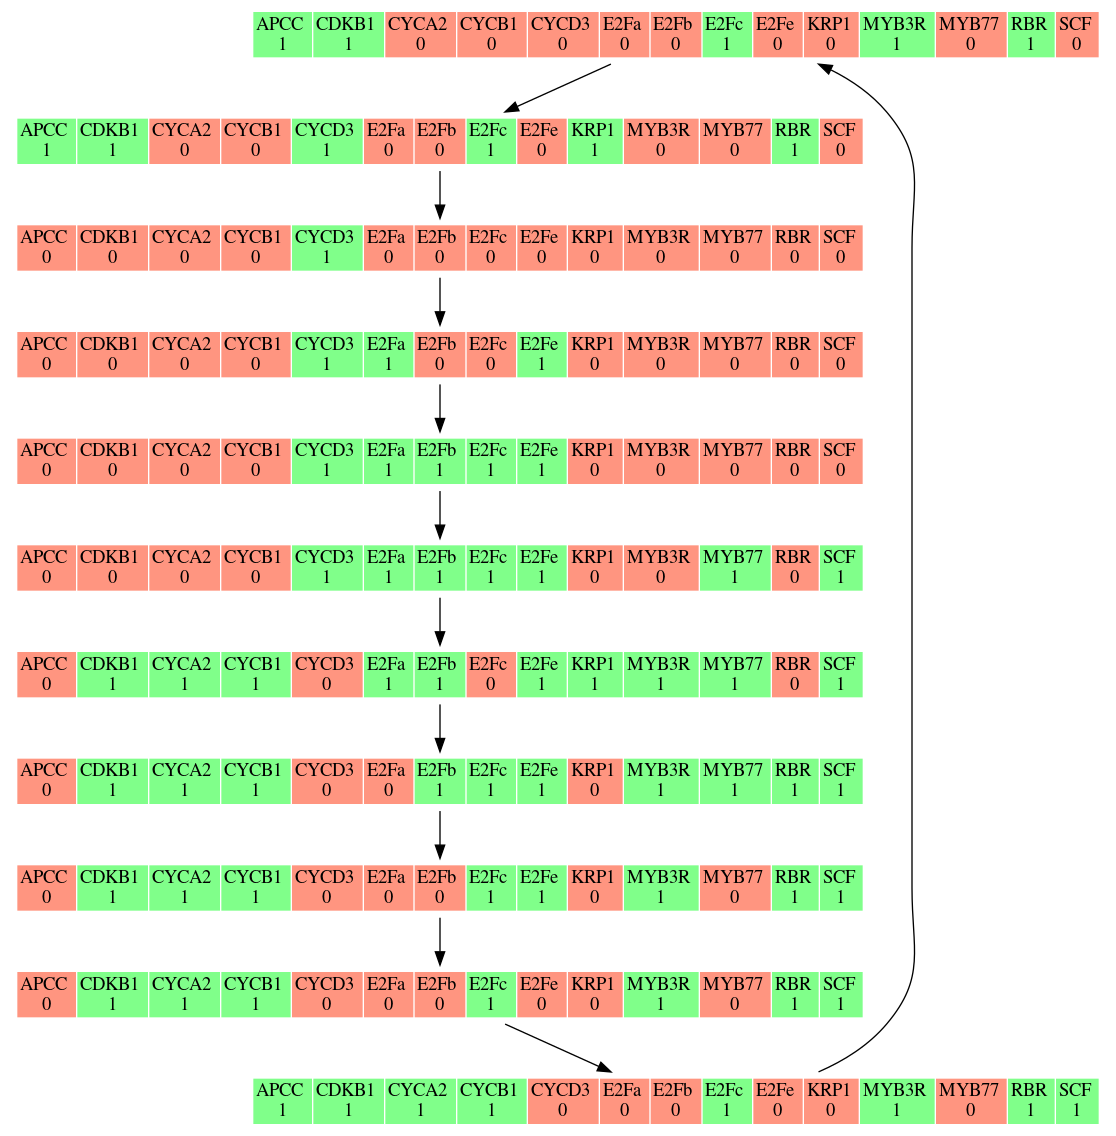

In [5]:
B.plot_state_transitions('aradopcc.png', initial_values=initial_state)
Image('aradopcc.png')

Initialising ODE system ... [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
done. 
Status: Start
Status: End


<Figure size 1440x720 with 0 Axes>

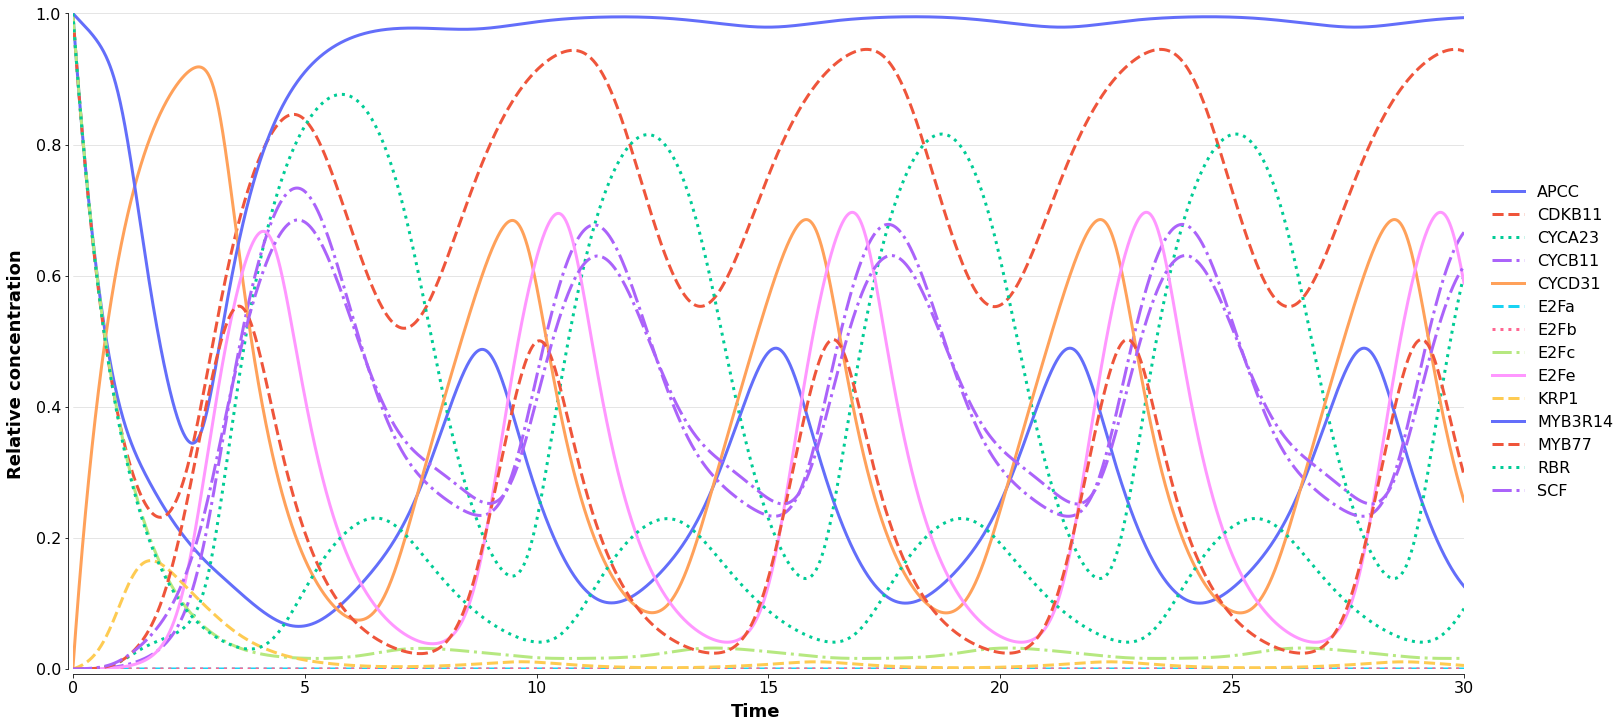

In [6]:
plt.figure(figsize=(20, 10))
t, y = B.continuous_simulation(initial_state=initial_state, 
                               t_max=30, transform='squad', 
                               h={'default':15},
                               gamma={'default':1}
                              )

Initialising ODE system ... done. 
Status: Start
Status: End


<Figure size 1440x720 with 0 Axes>

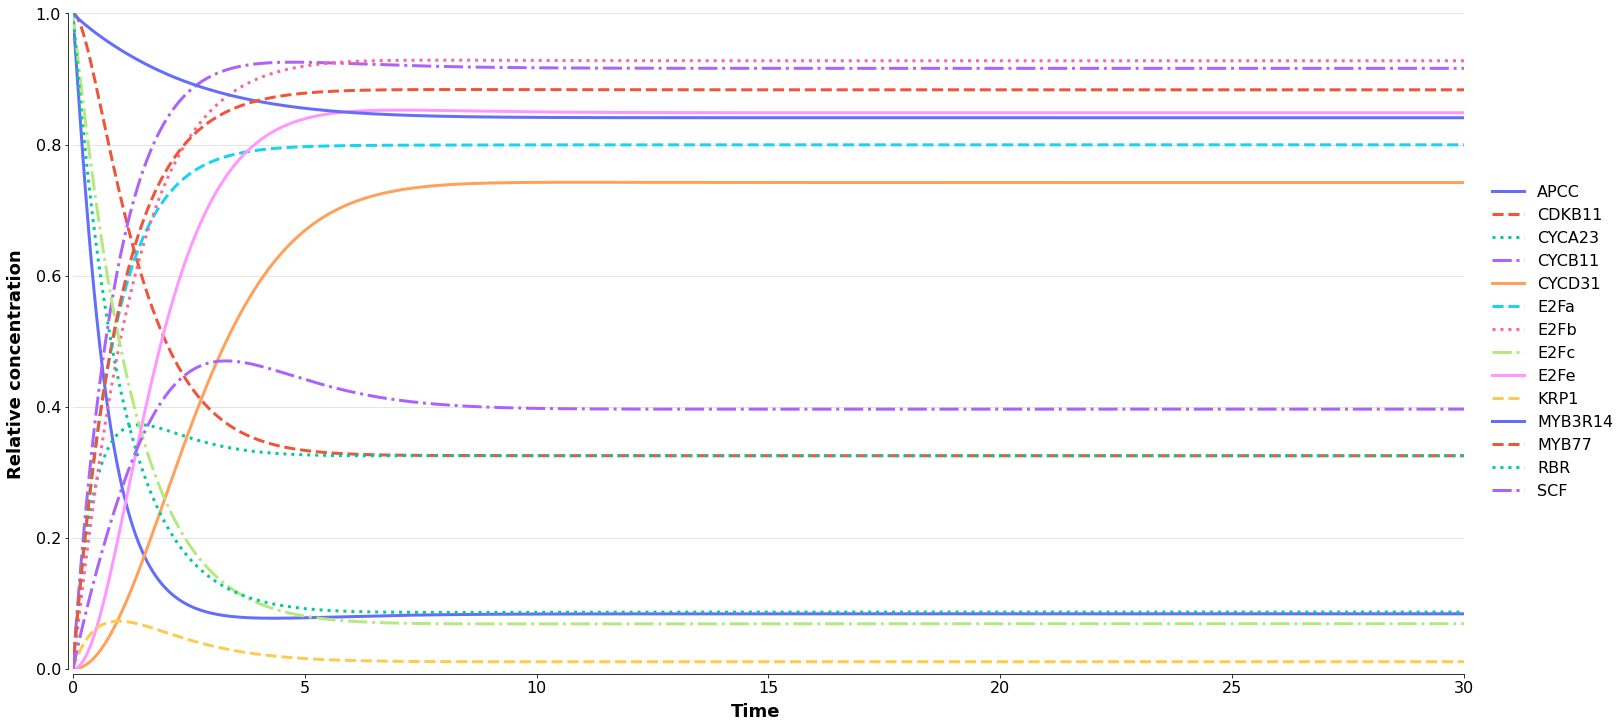

In [6]:
plt.figure(figsize=(20, 10))
t, y = B.continuous_simulation(initial_state=initial_state, #{'E2Fc':1}, 
                               t_max=30, transform='squad', 
                               h={'default':15},
                               gamma={'default':1, 'APCC':2},
                              )

Initialising ODE system ... done. 
Status: Start
Status: End


<Figure size 1440x720 with 0 Axes>

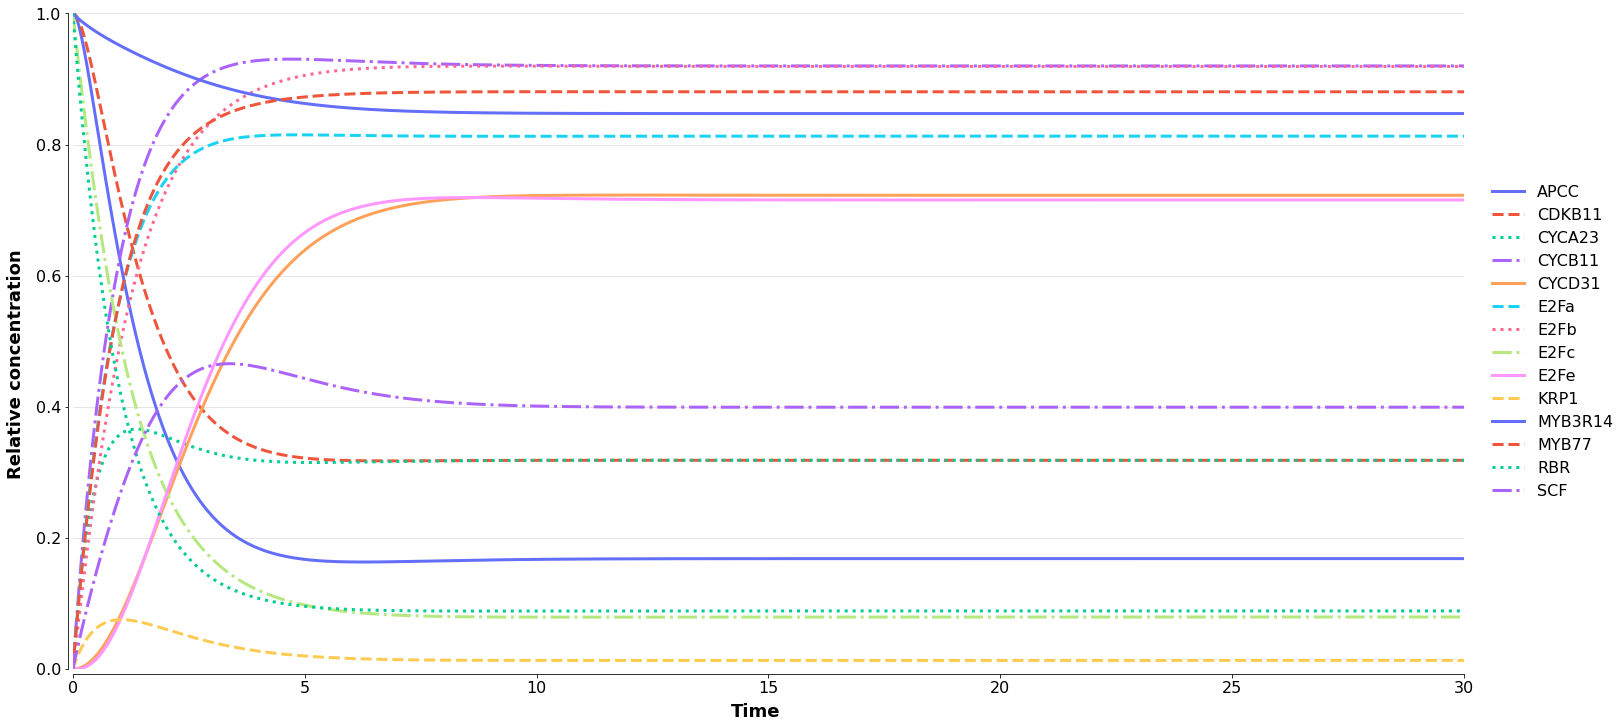

In [7]:
plt.figure(figsize=(20, 10))
t, y = B.continuous_simulation(initial_state=initial_state, #{'E2Fc':1}, 
                               t_max=30, transform='squad', 
                               h={'default':15, 'MYB3R14':1},
                               gamma={'default':1}
                              )

In [ ]:
plt.figure(figsize=(20, 10))
t, y = B.continuous_simulation(initial_state=initial_state, #{'E2Fc':1}, 
                               t_max=30, transform='squad', 
                               h={'default':15, 'MYB3R14':1},
                               gamma={'default':1},# 'APCC':2},
                              )

In [ ]:
t, y = B.continuous_simulation(initial_state=initial_state, #{'E2Fc':1}, 
                               t_max=30, transform='squad', 
                               h={'default':15},#, 'MYB3R14':1},
                               gamma={'default':1, 'CYCD31':2},
                              #plot_nodes=['E2Fc', 'KRP1']
                              )

In [ ]:
plt.figure(figsize=(20, 10))
t, y = B.continuous_simulation(initial_state=initial_state, #{'E2Fc':1}, 
                               t_max=30, transform='squad', 
                               h={'default':15, 'MYB3R14':1},#, 'MYB3R14':1},
                               gamma={'default':1},
                              #plot_nodes=['E2Fc', 'KRP1']
                              )

In [ ]:
y[:,B.index['MYB3R14']]

In [ ]:
ode = B.transform_bool_to_continuous(transform='squad', 
                               h={'default':15, 'MYB3R14':1},#, 'MYB3R14':1},
                               gamma={'default':1})

In [ ]:
ode

In [ ]:
from cycler import cycler
import numpy as np

x = np.linspace(0, 2 * np.pi, 50)
offsets = np.linspace(0, 2 * np.pi, 7, endpoint=False)
yy = np.transpose([np.sin(x + phi) for phi in offsets])

custom_cycler = (
                 cycler(linestyle=['', ' ', 'None', '--', '-.', '-', ':'])
)

fig, ax1 = plt.subplots(nrows=1, figsize=(20, 10))
ax1.set_prop_cycle(custom_cycler)
ax1.plot(yy, linewidth=3)
ax1.set_title('Plotly color cycle')
ax1.legend(['', ' ', 'None', '--', '-.', '-', ':'])
# Add a bit more space between the two plots.
fig.subplots_adjust(hspace=0.3)
plt.show()

In [ ]:
cycle_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', 
                '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', 
                '#FF97FF','#FECB52']
default_lines = ['-',  '--', ':', '-.']
a = (default_lines * (int(len(cycle_colors)/len(default_lines)) +1))[:len(cycle_colors)]

In [ ]:
ax.set

In [ ]:
a

In [ ]:
x = []
if x: 
    print('treu')

In [ ]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


In [ ]:
ax.set_ylim

In [ ]:
mpl.rcParamsDefault['axes.prop_cycle']

In [ ]:
fig, axes = plt.subplots(nrows=1, squeeze=False)

In [ ]:
axes[0, 0]

In [ ]:
from cycler import cycler
import numpy as np

x = np.linspace(0, 2 * np.pi, 50)
offsets = np.linspace(0, 2 * np.pi, 10, endpoint=False)
yy = np.transpose([np.sin(x + phi) for phi in offsets])

#
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))

cycle_colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', 
                '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', 
                '#FF97FF','#FECB52']
default_lines = ['-',  '--', ':', '-.']
cycle_lines = (default_lines * (int(len(cycle_colors)/len(default_lines)) +1))[:len(cycle_colors)]

custom_cycler = (cycler(color=cycle_colors) + 
                 cycler(linestyle=cycle_lines)
)

custom_cycler2 = (cycler(color=cycle_colors))


fig, (ax0, ax1, ax3) = plt.subplots(nrows=3, figsize=(20, 15))
ax0.plot(yy)
ax0.set_title('Default')

ax1.set_prop_cycle(custom_cycler2)
ax1.plot(yy, linewidth=3)
ax1.set_title('Plotly color cycle')

ax3.set_prop_cycle(custom_cycler)
ax3.plot(yy, linewidth=3)
ax3.set_title('Plotly color cycle with  linestyle cycle')




# Add a bit more space between the two plots.
fig.subplots_adjust(hspace=0.3)
plt.show()

In [ ]:
from matplotlib import cm
import matplotlib as mpl
mpl.rcParams['axes.color_cycle'] = ['#129845','#271254', '#FA4411', '#098765', '#000009']

def plot_simulation(t, y, events_d=None, plot_nodes=[], **kwargs):

    plt.figure(figsize=(20, 10))

    ymin, ymax = -0.05, 1.1

    if events_d:
        # add vertical lines at events
        plt.vlines(x=sorted(events_d.keys())[:-1],
                   ymin=ymin, ymax=ymax,
                   colors='gray', ls='--', alpha=0.5)
        plt.vlines(x=edge_events.keys(),
                   ymin=ymin, ymax=ymax,
                   colors='azure', ls='--', alpha=0.5)


    if len(plot_nodes) == 0:
        y_plot = y
        legend_labels = B.index
    else:
        yidx = []
        legend_labels = []
        for node in plot_nodes:
            yidx.append(B.index[node])
            legend_labels.append(node)
        y_plot = y[:, yidx]


    lines = plt.plot(t, y_plot, '-', cmap=cm.tab20, linewidth=3)
    plt.legend(lines, legend_labels)

    plt.ylim([ymin, ymax])

In [ ]:
plot_simulation(t, y)

In [ ]:
plt.figure(figsize=(20, 10))
t, y = B.continuous_simulation(initial_state=initial_state, #{'E2Fc':1}, 
                               t_max=30, transform='squad', 
                               h={'default':15},#, 'MYB3R14':1},
                               gamma={'default':1, 'APCC':2},
                              plot_nodes=['E2Fc', 'KRP1']
                              )

In [ ]:
initial_state = {
    'APCC':1,
    'KRP1':0,
    'CYCA23':0,
    'CDKB11':1,
    'CYCB11':0,
    'MYB3R14':1,
    'MYB77':0,
    'E2Fe':0,
    'E2Fc':1,
    'E2Fb':0,
    'E2Fa':0,
    'RBR':1,
    'SCF':0,
    'CYCD31':0
}

In [ ]:
B.plot_state_transitions('aradopcc.png', initial_values=initial_state)

Image('aradopcc.png')

In [ ]:
Image('aradopcc.png')

In [ ]:
ode.param_h

In [ ]:
dir(B)

In [ ]:
from PyBoolNet import InteractionGraphs

In [ ]:
intgraph = InteractionGraphs.primes2igraph(B.primes)

In [ ]:
f = "/home/cbleker/research/NIB/squad/BoolDoG/squad/squad2-2/samples/ortiz-gutierrex_AradopsisCellCycle.net"
with open(f, "w") as out:
    for node, d in intgraph.adjacency(): #nx 2.x
        for other_node, sub_d in d.items():
            sign = next(iter(sub_d["sign"]))
            if sign == 1:
                out.write(f"{node} -> {other_node}\n")
            elif sign == -1:
                out.write(f"{node} -| {other_node}\n")
            else:
                print("Warning: Issue with edge: ", node, other_node)

In [ ]:
import numpy as np
t[np.isclose(t, 10, 0.001)]

In [ ]:
y[np.isclose(t, 3, 0.001)][0]

In [ ]:
B1 = ode.homologue_b1()
def f(t, x_array):
    b1 = B1(x_array)
    return 1/1 * ( (1-b1[B.index['IKK']]) - x_array['IkB']) 

In [ ]:
ikb_ =0
for t_, x_array in zip(t, y):
    ikk_ = x_array[B.index['IKK']]
    ikb_ = f(ikb_, ikk_)
    print(f"{t_:5f}\t{ikk_:3f}\t{ikb_:3f}\t{x_array[B.index['IkB']]:3f}")

In [ ]:
ode = B.transform_bool_to_continuous('boolcube')


In [ ]:
x_array = np.zeros(B.n)
for t_, old_x_array in zip(t, y):
    x_array = ode.dxdt(t_, x_array)
    x = x_array[]
    ikk_ = x_array[13]
    print(f"{t_:5f}\t{ikk_:3f}\t{x:3f}")

In [ ]:
B.index

In [ ]:
ode.dxdt

In [ ]:
B.index['IKK']

In [ ]:
y[:, B.index['IKK']].shape

In [ ]:
from itertools import product

In [ ]:
i = 0
for x in product([0, 1], repeat=38):
    i += 1
print(i)

In [ ]:
i

In [ ]:
len(x)

In [ ]:
2**38

In [ ]:
product?

In [ ]:
from IPython.display import Image
import os
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt


In [ ]:
bnet = '''
var_A, var_A
var_B, var_A & !var_C
var_C, !(var_A | var_C)
'''
initial_state = {"var_A":0, "var_B":1, "var_C":1}

B = booldog.RegulatoryNetwork(bnet, data_format='bnet')
ode = B.transform_bool_to_continuous('boolcube')

t, y = B.continuous_simulation(initial_state=initial_state, t_max=10, transform='boolcube',
                              export="test.txt")


In [ ]:
B.plot_state_transitions("test.png")
Image("test.png")

In [ ]:
B = booldog.RegulatoryNetwork('./networks/Athaliana.graphml', data_format='graphml')


In [ ]:
B = booldog.RegulatoryNetwork('./networks/klamt_tcr.bnet', data_format='bnet')


In [ ]:
#B.plot_state_transitions("test.png")
#Image("test.png")

In [ ]:
B.primes

In [ ]:
_ = B.continuous_simulation(initial_state=0, t_max=10, transform='boolcube',
                       )

In [ ]:
B.bool

In [ ]:
ode = B.transform_bool_to_continuous('boolcube')

In [ ]:
import importlib
import inspect
from enum import EnumMeta

_readonly_attrs = {'__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__',
               '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__get__',
               '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__',
               '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__',
               '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__',
               '__subclasshook__', '__weakref__', '__members__', '__mro__', '__itemsize__', '__isabstractmethod__',
               '__basicsize__', '__base__'}


def reset_module(module, inner_modules_also=True):
    """
    This function is a stronger form of importlib's `reload` function. What it does, is that aside from reloading a
    module, it goes to the old instance of the module, and sets all the (not read-only) attributes, functions and classes
    to be the reloaded-module's
    :param module: The module to reload (module reference, not the name)
    :param inner_modules_also: Whether to treat ths module as a package as well, and reload all the modules within it.
    """
    
    print(module)
    new_module = importlib.reload(module)

    reset_items = set()

    # For the case when the module is actually a package
    if inner_modules_also:
        submods = {submod for _, submod in inspect.getmembers(module)
                   if (type(submod).__name__ == 'module') and (submod.__package__.startswith(module.__name__))}
        for submod in submods:
            reset_module(submod, True)

    _reset_item_recursively(module, new_module, module.__name__, reset_items)


def _reset_item_recursively(item, new_item, module_name, reset_items=None):
    if reset_items is None:
        reset_items = set()

    attr_names = set(dir(item)) - _readonly_attrs

    for sitem_name in attr_names:

        sitem = getattr(item, sitem_name)
        new_sitem = getattr(new_item, sitem_name)

        try:
            # Set the item
            setattr(item, sitem_name, new_sitem)

            try:
                # Will work for classes and functions defined in that module.
                mod_name = sitem.__module__
            except AttributeError:
                mod_name = None

            # If this item was defined within this module, deep-reset
            if (mod_name is None) or (mod_name != module_name) or (id(sitem) in reset_items) \
                    or isinstance(sitem, EnumMeta):  # Deal with enums
                continue

            reset_items.add(id(sitem))
            _reset_item_recursively(sitem, new_sitem, module_name, reset_items)
        except Exception as ex:
            raise Exception(sitem_name) from ex

In [ ]:
reset_module(squad_reboot)
reset_module(squad_reboot)

In [ ]:
B = squad_reboot.RegulatoryNetwork(bnet, data_format='bnet')
ode = B.transform_bool_to_continuous('boolcube')

In [ ]:
g1 = {'var_A': {'var_A': '+'}, 
      'var_B': {'var_A': '+', 'var_C': '-'}, 
      'var_C': {'var_A': '-', 'var_B': '-'}}
B = squad_reboot.RegulatoryNetwork(g1, data_format='interactions')

In [ ]:
bnet = '''
var_A, var_A
var_B, var_A & !var_C
var_C, !(var_A | var_C)
'''
initial_state = {"var_A":0, "var_B":1, "var_C":1}

In [ ]:
B = squad_reboot.RegulatoryNetwork(bnet, data_format='bnet')

In [ ]:
_ = B.continuous_simulation(initial_state=initial_state, t_max=10, transform='squad')

In [ ]:
_ = B.continuous_simulation(initial_state=initial_state, t_max=10, transform='boolcube')

In [ ]:
_ = B.continuous_simulation(initial_state=initial_state, t_max=10, transform='boolcube')

In [ ]:
_ = B.continuous_simulation(initial_state=initial_state, t_max=10, transform='hillcube')

In [ ]:
_ = B.continuous_simulation(initial_state=initial_state, t_max=10, transform='normalisedhillcube')

In [ ]:
bnet = """
ETR1, ETR1
CTR1, CTR1
ET, ET
ETR1CTR1, (ETR1 & CTR1) & !ET
EIN2, EIN2 & !ETR1CTR1
"""
initial_state = {'ETR1':1, 'CTR1':1, 'ETR1CTR1':0, 'ET':0, 'EIN2':0}

In [ ]:
bnet = """
A, A
ETR1, ETR1
CTR1, CTR1
ET, ET
ETR1CTR1, (ETR1 & CTR1) & !ET
EIN2, (A | EIN2) & !ETR1CTR1
"""
initial_state = {'A':1, 'ETR1':1, 'CTR1':1, 'ETR1CTR1':0, 'ET':0, 'EIN2':0}

In [ ]:
bnet_alf = '''
A, A
B, B
C, C
E, E
D, (B & C) & !E
F, (A | F) & !D
'''
initial_state_alf = {'A':1, 'B':1, 'C':1, 'D':0, 'E':0, 'F':0}

In [ ]:
reset_module(squad_reboot)
reset_module(squad_reboot)

In [ ]:
B = squad_reboot.RegulatoryNetwork(bnet, data_format='bnet')

In [ ]:
B_alf = squad_reboot.RegulatoryNetwork(bnet_alf, data_format='bnet')

In [ ]:
t, y = B.continuous_simulation(initial_state=initial_state, t_max=30, 
                                gamma=10, transform='squad',
                              #plot_nodes = ['ETR1CTR1', 'EIN2', 'ET'], 
                              node_events=[{"time":10, "node":'ET', 'value':1, 'duration':5},
                                           {"time":18, "node":"ETR1", 'value':0.3}])

In [ ]:
bnet = """
A, A
ETR1, ETR1
CTR1, CTR1
ET, ET
ETR1CTR1, (ETR1 & CTR1) & !ET
EIN2, (A | EIN2) & !ETR1CTR1
"""

initial_state = {'A':1, 'ETR1':1, 'CTR1':1, 'ETR1CTR1':0, 'ET':0, 'EIN2':0}
B = squad_reboot.RegulatoryNetwork(bnet, data_format='bnet')
t, y = B.continuous_simulation(initial_state=initial_state, t_max=30, 
                               transform='squad', 
                               node_events=[{"time":10, "node":'ET', 'value':1}])

In [ ]:
bnet_alf = '''
A, A
B, !A
C,  (A | C) & !B
'''

In [ ]:
reset_module(squad_reboot)
reset_module(squad_reboot)
B_alf = squad_reboot.RegulatoryNetwork(bnet_alf, data_format='bnet')

In [ ]:
ints = {'A':0, 'B':1, 'C':1}
t, y = B_alf.continuous_simulation(initial_state=ints, t_max=8, 
                                   n=3, k=0.5, tau=1,
                                   transform='boolcube')

In [ ]:
ints = {'A':1, 'B':1, 'C':0}
t, y = B_alf.continuous_simulation(initial_state=ints, t_max=8, 
                                   n=3, k=0.5, tau=1,
                                   transform='boolcube')

In [ ]:
ode = B_alf.transform_bool_to_continuous('boolcube')

In [ ]:
def F(x_array, x_bool):
    #return {0:1-x_array, 1:x_array}[x_bool]
    return x_array * x_bool + (1 - x_bool)*(1 - x_array)


b1 = 0
x_array = np.array([1, 1, 0])
spaces = set()
for prime_dict in ode.boolean_graph.primes['C'][1]:
    print(prime_dict)
    # sum where B() = 1 part 1
    # in this partly fixed state, B() = 1
    # 1-prime implicant holds fixed node states, we need to iterate
    # over all free node states as well
    for x_bool in B_alf.boolean_graph.generate_states(
                                fixed=prime_dict):
        if not tuple(x_bool) in spaces:
            print(x_bool)
        spaces.add(tuple(x_bool))
        # sum where B() = 1 part 2
        #b  = np.product(F(x_array, x_bool))
        #b1 += b
        
        #print(b)
        

In [ ]:
b1

In [ ]:
ode.boolean_graph.primes['C'][1]

In [ ]:
from PyBoolNet.PrimeImplicants import input_combinations

In [ ]:
for x in input_combinations(ode.boolean_graph.primes, Format="str"):
    print(x)

In [ ]:
from PyBoolNet.StateTransitionGraphs import list_states_in_subspace

In [ ]:
list_states_in_subspace(ode.boolean_graph.primes, {'C':1})

In [ ]:
B_alf.boolean_graph.primes

In [ ]:
ode.boolean_graph.primes['A'][1]

In [ ]:
t, y = B.continuous_simulation(initial_state=initial_state, t_max=30, 
                               transform='boolcube', 
                              #plot_nodes = ['ETR1CTR1', 'EIN2', 'ET'], 
                              node_events=[{"time":10, "node":'ET', 'value':1}])

In [ ]:
y[t==10].round()

In [ ]:
B.boolean_graph.index

In [ ]:
initial_state_a = {'A':1, 'ETR1':1, 'CTR1':1, 'ETR1CTR1':1, 'ET':1, 'EIN2':0}
t, y = B.continuous_simulation(initial_state=initial_state_a, t_max=30, 
                               transform='hillcube', n=3, k=0.5
                              #plot_nodes = ['ETR1CTR1', 'EIN2', 'ET']
                              )

In [ ]:
ode = B.transform_bool_to_continuous('boolcube')

In [ ]:
ode.homologue_b1(np.array([0,0,0,0,0,.5]))

In [ ]:
ode.boolean_graph.primes['EIN2'][1]

In [ ]:
def F(x_array, x_bool):
            #return {0:1-x_array, 1:x_array}[x_bool]
            return x_array * x_bool + (1 - x_bool)*(1 - x_array)

In [ ]:
x_array = np.array([1., 1., 1., 1., 1., 0])

In [ ]:
def F(x_array, x_bool):
            #return {0:1-x_array, 1:x_array}[x_bool]
            return x_array * x_bool + (1 - x_bool)*(1 - x_array)


b1 = 0
for prime_dict in ode.boolean_graph.primes['EIN2'][1]:
    # sum where B() = 1 part 1
    # in this partly fixed state, B() = 1
    # 1-prime implicant holds fixed node states, we need to iterate
    # over all free node states as well
    for x_bool in B.boolean_graph.generate_states(
                                fixed=prime_dict):
    # sum where B() = 1 part 2
        b1  +=\
                                np.product(F(hill(x_array, n=3, k=0.5), x_bool))

In [ ]:
b1

In [ ]:
B1 = ode.homologue_b1(hill(x_array, n=3, k=0.5))
B1[ode.boolean_graph.index['EIN2']]

In [ ]:
tau = 1
1/tau * ( B1  - x_array)

In [ ]:
B1

In [ ]:
sum(y[:, 5] <0)

In [ ]:
plt.plot(t, y[:, 5])
plt.ylim([-1, 1])
plt.xlim([0, 30])

In [ ]:
plt.plot(t, y[:, 2])
plt.ylim([0, 30])
plt.xlim([0, 30])

In [ ]:
y.shape

In [ ]:
t, y = B.continuous_simulation(initial_state=initial_state, t_max=30, 
                               transform='boolcube', 
                              plot_nodes = ['ETR1CTR1', 'EIN2', 'ET'], 
                              node_events=[{"time":10, "node":'ET', 'value':1}])

In [ ]:
reset_module(squad_reboot)
reset_module(squad_reboot)

In [ ]:
# t-cell signalling network
tcell_bnet = '''
A, 1
ZAP_70, A
LAT_phospho, ZAP_70
cCbl, ZAP_70
'''




In [ ]:
Tnet = squad_reboot.RegulatoryNetwork(tcell_bnet, data_format='bnet')

In [ ]:
ode = Tnet.transform_bool_to_continuous('boolcube')

In [ ]:
import timeit

In [ ]:
squad_reboot

In [ ]:
setup = """\
import sys
import numpy as np
sys.path.insert(0,'/home/cbleker/research/NIB/squad/squad-reboot')
import squad_reboot
tcell_bnet = '''
A, 1
ZAP_70, A
LAT_phospho, ZAP_70
cCbl, ZAP_70'''
Tnet = squad_reboot.RegulatoryNetwork(tcell_bnet, data_format='bnet')
ode = Tnet.transform_bool_to_continuous('squad')
"""
timeit.timeit('ode.dxdt(10, np.array([1, .2, .3, .4]))', number=10000, setup=setup)

In [ ]:
setup = """\
import sys
import numpy as np
sys.path.insert(0,'/home/cbleker/research/NIB/squad/squad-reboot')
import squad_reboot
tcell_bnet = '''
A, 1
ZAP_70, A
LAT_phospho, ZAP_70
cCbl, ZAP_70'''
Tnet = squad_reboot.RegulatoryNetwork(tcell_bnet, data_format='bnet')
ode = Tnet.transform_bool_to_continuous('boolcube')
"""


timeit.timeit('ode.dxdt(10, np.array([1, .2, .3, .4]))', number=10000, setup=setup)

In [ ]:
import timeit

setup = """\
import sys
import numpy as np
sys.path.insert(0,'/home/cbleker/research/NIB/squad/squad-reboot')
import squad_reboot
tcell_bnet = '''
A, 1
ZAP_70, A
LAT_phospho, ZAP_70
cCbl, ZAP_70'''
Tnet = squad_reboot.RegulatoryNetwork(tcell_bnet, data_format='bnet')
ode = Tnet.transform_bool_to_continuous('hillcube')
"""
timeit.timeit('ode.dxdt(10, np.array([1, .2, .3, .4]))', number=10000, setup=setup)

In [ ]:
setup = """\
import sys
import numpy as np
sys.path.insert(0,'/home/cbleker/research/NIB/squad/squad-reboot')
import squad_reboot
tcell_bnet = '''
A, 1
ZAP_70, A
LAT_phospho, ZAP_70
cCbl, ZAP_70'''
Tnet = squad_reboot.RegulatoryNetwork(tcell_bnet, data_format='bnet')
ode = Tnet.transform_bool_to_continuous('boolcube')
"""
timeit.timeit('ode.dxdt(10, np.array([1, .2, .3, .4]))', number=10000, setup=setup)

In [ ]:
@np.vectorize
def evaluate_all(f, x):
    return f(x)

def homologue_b1(x_array):
    spaces = set()
    sums = []
    d = {}
    all_B1s = ['0']*Tnet.boolean_graph.n
    for node in Tnet.boolean_graph.nodes: # iterate over all nodes
        for prime_dict in ode.boolean_graph.primes[node][1]:
            for x_bool in Tnet.boolean_graph.generate_states(
                                        fixed=prime_dict):
                if not tuple(x_bool) in spaces:
                    spaces.add(tuple(x_bool))
                    product = []            
                    for i, b in enumerate(x_bool):
                        if b ==0:
                            product.append(f'(1-x_array[{i}])')
                        else:
                            product.append(f'x_array[{i}]')
                sums.append('*'.join(product))
        B1 = " + ".join(sums)
        if B1 != '':
            all_B1s[Tnet.boolean_graph.index[node]]  = B1
    
    return 'np.array([' + ','.join(all_B1s) + '])'

In [ ]:
string = homologue_b1(x_array)

In [ ]:
d = {}
exec('def ff(x_array): return ' + string, d)

In [ ]:
d['ff']

In [ ]:
def dxdt(t, x_array):
    return eval(string)

In [ ]:
dxdt(7, np.array([.1, .19, .86, .0]))

In [ ]:
ff(np.array([.1, .19, .3, .0]))

In [ ]:
eval(string, {"x_array":np.array([.1, .19, .9, .0]), "np":np})

In [ ]:
string

In [ ]:
np

In [ ]:
for b in homologue_b1(x_array):
    print(eval(b))

In [ ]:
exec('def ff(x_array): return ' + B1)


In [ ]:
d = {}
exec("def f(x_array): return " + B1, d)

In [ ]:
d['f'](np.array([.1, .19, .3, .0]))

In [ ]:
d.keys()

In [ ]:
d = {}

In [ ]:
d

In [ ]:
exec('def f(x_array): return ' + B1)

In [ ]:
ode.homologue_b1(np.array([.1, .19, .63, .8]))[Tnet.boolean_graph.index['LAT_phospho']]

In [ ]:
exec('def f(x_array): return ' + B1)

In [ ]:
f(np.array([.1, .19, .63, .8]))

In [ ]:
initial_state = {"A": 0,
                 "ZAP_70":0, 
                 "LAT_phospho":0, 
                 "cCbl":0
                }

In [ ]:
t, y = Tnet.continuous_simulation(initial_state=initial_state, t_max=100, 
                               transform='hillcube', 
                                  n=3, k=0.3, tau={"A":0},  
                                  node_events=[{"time":10, "node":'A', 'value':1}]
)

In [ ]:
t, y = Tnet.continuous_simulation(initial_state=initial_state, t_max=100, 
                               transform='boolcube', 
                                  n=3, k=0.3, tau={"A":0}
)

In [ ]:
t, y = Tnet.continuous_simulation(initial_state=initial_state, t_max=100, 
                               transform='squad', 
                                  n=3, k=0.3, tau={"A":0}
)

In [ ]:
[{"time":10, "node":"ERK", "duration":5, "value":1}, {"time":18, }]


{10:[{"node":"ERK", "duration":5, "value":1}]
}

In [ ]:
y[Tnet.boolean_graph.index['A']]

In [ ]:
Tnet.transform_bool_to_continuous?

In [ ]:
ode = Tnet.transform_bool_to_continuous('boolcube', n=3, k=0.3, tau={"A":0.1})

In [ ]:
ode.__init__?

In [ ]:
ode.__init_subclass__?

In [ ]:
ode.update?

In [ ]:
ode.dxdt(3, np.zeros(Tnet.n))

In [ ]:

x = np.linspace(0, 1, 101)

In [ ]:
Tnet.boolean_graph._get_node_functions

In [ ]:
ode.homologue_b1(np.array([0, 0, 0, 0]))

In [ ]:

Tnet.boolean_graph.index

In [ ]:
Tnet.boolean_graph.primes

In [ ]:
ode.

In [ ]:
tcs_bnet='''
targets, factors

# taken from
# Klamt S, Saez-Rodriguez J, Lindquist JA, Simeoni L, Gilles ED.  2006.  A methodology for the structural and functional analysis of signaling and regulatory networks. BMC Bioinformatics. 7(1):56.

CD45,     CD45
CD8,      CD8
TCRlig,   TCRlig

Fyn,      TCRbind&CD45 | LCK&CD45
LCK,      !PAGCsk&CD8&CD45
PAGCsk,   !TCRbind
TCRbind,  !cCbl&TCRlig
TCRphos,  TCRbind&LCK | Fyn
ZAP70,    !cCbl&TCRphos&LCK
cCbl,     ZAP70

AP1,      Jun&Fos
CRE,      CREB
CREB,     Rsk
Ca,       IP3
Calcin,   Ca
DAG,      PLCg_a
ERK,      MEK
Fos,      ERK
Gads,     LAT
Grb2Sos,  LAT
IKK,      PKCth
IP3,      PLCg_a
IkB,      !IKK
Itk,      ZAP70&Slp76
JNK,      SEK
Jun,      JNK
LAT,      ZAP70
MEK,      Raf
NFAT,     Calcin
NFkB,     !IkB
PKCth,    DAG
PLCg_a,   ZAP70&Slp76&Rlk&PLCg_b | ZAP70&Slp76&PLCg_b&Itk
PLCg_b,   LAT
Raf,      Ras
Ras,      RasGRP1&Grb2Sos
RasGRP1,  PKCth&DAG
Rlk,      LCK
Rsk,      ERK
SEK,      PKCth
Slp76,    Gads
'''

In [ ]:
Tnet = booldog.RegulatoryNetwork(tcs_bnet, data_format='bnet')

In [ ]:
t, y = Tnet.continuous_simulation(initial_state=0, t_max=10, 
                               transform='hillcube', 
                                  n=3, k=0.3
)

In [ ]:
reset_module

In [ ]:

def normalised_hill(x_array, n, k):
    return hill(x_array, n, k) / hill(1, n, k)

In [ ]:
## FIGURE 2B reconstruction
import numpy as np
import matplotlib.pyplot as plt

def hill(x_array, n, k):
    return x_array**n / (x_array**n + k**n)

x = np.linspace(0, 1, 101)

for k, c in [(0.3, 'red'), (0.8, 'yellow'), (0.1, 'blue')]:
    y = hill(x, 3, k)
    plt.plot(x, y, label=f"$k={k}$", color=c)

plt.vlines(x=[0.1, 0.3, 0.8],
           ymin=0, ymax=0.5,
           colors='gray', ls='--', alpha=0.5)  

plt.hlines( y=0.5, xmin=0, xmax=1,
           colors='gray', ls='--', alpha=0.5)

plt.legend()

In [ ]:
x = np.array([1, 2, 3])

In [ ]:
x**2

In [ ]:
B.continuous_simulation?

In [ ]:
plt.subplots(1, 3)

In [ ]:
help(squad_reboot.ode.BoolCube?

In [ ]:
help(squad_reboot.ode.BoolCube

In [ ]:
import PyBoolNet

In [ ]:
PyBoolNet.FileExchange.bnet2primes("./networks/cellcycle.net")

In [ ]:
PyBoolNet.StateTransitionGraphs.successor_synchronous?

In [ ]:
PyBoolNet.StateTransitionGraphs.successors_asynchronous?

In [ ]:
5 % 1

In [ ]:
B.boolean_graph.primes

In [ ]:
import PyBoolNet

In [ ]:

stg = PyBoolNet.StateTransitionGraphs.primes2stg(B.boolean_graph.primes, "synchronous")

In [ ]:
from IPython.display import Image


In [ ]:
fig =  "orig_bnet.png"
primes = PyBoolNet.FileExchange.bnet2primes(bnet)
print(list(primes.keys()))
stg = PyBoolNet.StateTransitionGraphs.primes2stg(primes, "synchronous")
stg.graph["node"]["color"] = "cyan"
stg.graph["node"]["height"] = 0.3
stg.graph["node"]["width"] = 0.45
PyBoolNet.StateTransitionGraphs.stg2image(stg, fig, LayoutEngine="dot")


In [ ]:
Image('orig_bnet.png')

In [ ]:
stg.order()

In [ ]:
PyBoolNet.Utility.DiGraphs.digraph2dotlines(stg)

In [ ]:
B.dynamic_simulation?

In [ ]:
squad_reboot.bool_graph.BooleanGraph

In [ ]:
from squad_reboot.bool_graph import BooleanGraph

In [ ]:
G = BooleanGraph(g1, 'interactions')

In [ ]:
squad_reboot.ode.BoolCube?

In [ ]:
isinstance(G, BooleanGraph)

In [ ]:
isinstance(B.boolean_graph, BooleanGraph)

In [ ]:
type(B.boolean_graph)

In [ ]:
squad_reboot.BooleanGraph

In [ ]:
isinstance(type(5), (type(7.0), dict, int))

In [ ]:
import PyBoolNet

In [ ]:
PyBoolNet.InteractionGraphs.networkx.__version__

In [ ]:
PyBoolNet.FileExchange.read_primes?

In [ ]:
PyBoolNet.Repository.get_primes('dahlhaus_neuroplastoma')

In [ ]:
dahlhaus_neuroplastoma

In [ ]:
from itertools import product

In [ ]:
for x in product([0, 1], repeat=5):
    print(x)

In [ ]:
np.product(x)

In [ ]:
raise NotImplementedError

In [ ]:
str(type(1))

In [ ]:
from squad_reboot import io

In [ ]:
io.import_bnet?

In [ ]:
import squad_reboot.io

In [ ]:
squad_reboot.SquadRegulatoryNetwork?

In [ ]:
from importlib import reload


In [ ]:
reload(squad_reboot)

In [ ]:
B = squad_reboot.SquadRegulatoryNetwork(g1)

In [ ]:

from importlib import reload

import xmltodict

# https://github.com/hklarner/PyBoolNet/blob/master/Docs/Sphinx/source/Development.rst
import sys
sys.path.insert(0,'/home/cbleker/research/NIB/ADAPT/squad/SQUAD-reboot/dependencies/PyBoolNet')
import PyBoolNet

In [ ]:
g = squad_reboot.import_graphml("./examples/Athaliana.graphml")

In [ ]:
dir(squad_reboot)

In [ ]:
squad_reboot.__path__

In [ ]:
dir(squad_reboot.utils)

In [ ]:
squad_reboot.utils._ensure_ndarray

## Example from [SQUADTransformation.ipynb](https://github.com/caramirezal/SQUADBookChapter/blob/master/SQUADTransformation.ipynb)

In [ ]:
g1 = {'A1': {'A1': '+'}, 
      'B1': {'A1': '+', 'C1': '-'}, 
      'C1': {'A1': '-', 'B1': '-'}}

In [ ]:
B = squad_reboot.RegulatoryNetwork(g1, format='interactions')

In [ ]:
initial_state = {"A1":0, "B1":1, "C1":1}
_ = B.continuous_simulation(initial_state=initial_state, transform='squad', h=50, t_max=10)

## Example from [SQUAD_implementation.ipynb](https://github.com/caramirezal/SQUADBookChapter/blob/master/SQUAD_implementation.ipynb)

In [ ]:
# error in original https://github.com/caramirezal/SQUADBookChapter/blob/master/SQUAD_implementation.ipynb??
g2 = {"A":{"A":"+", "B":"-", "X":"+"},  
      "B":{"A":"-", "Y":"+", "B":"+"}, 
      "X":{"Z":"-", "A":"+"},
      "Y":{"A":"-", "B":"+"},
      "Z":{"B":"+"}}


In [ ]:
reset_module(squad_reboot)
reset_module(squad_reboot)

In [ ]:
B = squad_reboot.RegulatoryNetwork(g2, 'interactions')

In [ ]:
initial_state = 0
events = {10:{"X":{"perturbation":.25}}, 
          20:{"Y":{"perturbation":.25}}}
_ = B.continuous_simulation(node_events=events, initial_state=initial_state, transform='squad', gamma=50)

In [ ]:
x = B.transform_bool_to_continuous('boolcube')

In [ ]:
x

In [ ]:
node_events = {
    10:{"X":{"perturbation":.25, "duration":5}}, 
    20:{"Y":{"perturbation":1}, 
        "Z":{"perturbation":1}
       }
    }


In [ ]:
initial_state = 0
events = {10:{"X":{"perturbation":.25}}, 
          20:{"Y":{"perturbation":.25}}}
_ = B.continuous_simulation(node_events=events, initial_state=initial_state, gamma=50)

In [ ]:
events = {10:{"Y":{"perturbation":1}}, 
          20:{"X":{"perturbation":1}}}
_ = B.dynamic_simulation(events=events, initial_state=initial_state)

In [ ]:
events = {10:{"X":{"perturbation":1}}, 
          20:{"Y":{"perturbation":1}}}
_ = B.dynamic_simulation(events=events, initial_state=initial_state)

In [ ]:
events = {9:{"A":{"perturbation":0.5, "duration":1}}, 
          7:{"Y":{"perturbation":0.3, "duration":5}},
          10:{"X":{"perturbation":.25, "duration":5}, "Z":{"perturbation":0}}, 
          20:{"Y":{"perturbation":1}}
         }
_ = B.dynamic_simulation(events=events, initial_state=initial_state)

## A. thaliana network from graphml


In [ ]:
import xmltodict

In [ ]:
# load graph
g_path = "./examples/Athaliana.graphml"
g = ig.Graph.Read_GraphML(g_path)

# add edge attributes (i.e. activator or inhibitor)
with open(g_path) as f:
    d = xmltodict.parse(f.read())
    
D = {}
W = {}
N = {}

for v in d["graphml"]["graph"]["node"]:
    N[v["@id"]] = v["data"]["y:ShapeNode"]["y:NodeLabel"]["#text"]


for e in d["graphml"]["graph"]["edge"]:
    if e["data"]["y:PolyLineEdge"]['y:Arrows']['@target'] == "standard":
        D[e["@id"]] = "+"
        W[e["@id"]] = 1
    elif e["data"]["y:PolyLineEdge"]['y:Arrows']['@target'] == "white_diamond":
        D[e["@id"]] = "-"
        W[e["@id"]] = -1
    else: 
        print(e["@id"])
        
for e in g.es():
    e["type"] = D[e["id"]]
    e["weight"] = W[e["id"]]

for v in g.vs():
    v["id"] = N[v["id"]]
    
del D, W, N

In [ ]:
edge_color_dict = {"+":"green", "-":"red"}
layout = g.layout("circular")
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = g.vs["id"]
visual_style["edge_color"] = [edge_color_dict[e["type"]] for e in g.es()]
visual_style["layout"] = layout
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 40
visual_style["arrow_size"] = 900
visual_style["arrow_width"] = 0

ig.plot(g, **visual_style)

In [ ]:
# standard dictionary
g3 = {node["id"]:{} for node in g.vs()}
for e in g.es():
    source = g.vs()[e.source]["id"]
    target = g.vs()[e.target]["id"]
    sign = e["type"]
    g3[target][source] = sign
g3

In [ ]:
B = squad_reboot.SquadRegulatoryNetwork(squad_reboot.import_graphml("./examples/Athaliana.graphml"))

In [ ]:
reload(squad_reboot)
B = squad_reboot.SquadRegulatoryNetwork(squad_reboot.import_graphml("./examples/Athaliana.graphml"))

In [ ]:
t, y = B.dynamic_simulation(t_max=30, gamma=1, h=10)

In [ ]:
t, y = B.dynamic_simulation(t_max=30, gamma=1, h=10)

In [ ]:
events = {9:{"TFL1":{"perturbation":0.5, "duration":1}}, 
          7:{"FT":{"perturbation":0.3, "duration":5}},
          10:{"AP2":{"perturbation":.25, "duration":5}, 
              "FUL":{"perturbation":0}}, 
          20:{"UFO":{"perturbation":1}}
         }

In [ ]:
t, y = B.dynamic_simulation(t_max=30, gamma=1, h=10, events=events)

In [ ]:
type(1)

In [ ]:
type(1.0)

In [ ]:

to_plot = ["TFL1", "EMF1", "FT", "AP2", "FUL", "UFO"]
keys = [B.keys[x] for x in to_plot]
indx = np.argsort(keys)

names = [to_plot[i] for i in indx]
keys = [keys[i] for i in indx]

lines = plt.plot(t, y[:, keys])#, ['-', '-.', '-', '-.'])

plt.legend(lines, names)
#plt.ylim([0, 0.01])

In [ ]:

to_plot = ["TFL1", "EMF1", "FT", "AP2", "FUL", "UFO"]
keys = [B.keys[x] for x in to_plot]
indx = np.argsort(keys)

names = [to_plot[i] for i in indx]
keys = [keys[i] for i in indx]

lines = plt.plot(t, y[:, keys])#, ['-', '-.', '-', '-.'])

plt.legend(lines, names)
#plt.ylim([0, 0.01])

In [ ]:

to_plot = ["EMF1", "AP2"]
keys = [B.keys[x] for x in to_plot]
indx = np.argsort(keys)

names = [to_plot[i] for i in indx]
keys = [keys[i] for i in indx]

lines = plt.plot(t, y[:, keys])#, ['-', '-.', '-', '-.'])

plt.legend(lines, names)
#plt.ylim([0, 0.01])

In [ ]:

to_plot = ["UFO", "WUS"]
keys = [B.keys[x] for x in to_plot]
indx = np.argsort(keys)

names = [to_plot[i] for i in indx]
keys = [keys[i] for i in indx]

lines = plt.plot(t, y[:, keys])#, ['-', '-.', '-', '-.'])
plt.legend(lines, names)
#plt.ylim([0, 0.01])

In [ ]:

to_plot = ["TFL1"]
keys = [B.keys[x] for x in to_plot]
indx = np.argsort(keys)

names = [to_plot[i] for i in indx]
keys = [keys[i] for i in indx]

lines = plt.plot(t, y[:, keys])#, ['-', '-.', '-', '-.'])
plt.legend(lines, names)
#plt.ylim([0, 0.01])

In [ ]:
B.keys

In [ ]:
-np.inf > 0

In [ ]:
[to_plot[i] for i in indx]

In [ ]:
[B.keys[x] for x in ["AP2", "TFL1", "EMF1"]]

In [ ]:
np.round(y[:, 5], 3)

In [ ]:
y.shape

In [ ]:
np.array([10])

In [ ]:
B.keys

In [ ]:
B.boolean_graph["EMF1"]

In [ ]:
B.Inh

In [ ]:
from importlib import reload


In [ ]:
for node, inputs in B.boolean_graph.items():
    break


In [ ]:
[node for node in inputs if inputs[node] == "+"]

In [ ]:
inputs

In [ ]:
# steady states
B.bool_steady_states()

In [ ]:
symbol_D = {"-":"-|",
            "+":"->"}
with open("../squad2-2/samples/Athaliana.net", "w") as out:
    for node, subd in B.boolean_graph.items():
        for other_node, sign in subd.items():
            symbol = symbol_D[sign]
            out.write("{0} {1} {2}\n".format(other_node, symbol, node))

In [ ]:
    def _omega_og(self, x):
        '''
        Based on decompiled Java (org/enfin/squad/bl/ode/AbstractStandardizedODE.java
        '''
        o = np.zeros(self.n)
        for node, inputs in self.boolean_graph.items():
            totalPositiveInput = 1.0
            totalNegativeInput = 1.0
            positiveInputs = [node for node in inputs if inputs[node] == "+"]
            negativeInputs = [node for node in inputs if inputs[node] == "-"]
            
            weightedInput = 0
            weightedInput = 0.0
            summOfWeights = 0.0
            edgeWeight = 0.0
            for other_node in positiveInputs:
                edgeWeight = 1
                weightedInput += edgeWeight * x[self.keys[other_node]]
                summOfWeights += edgeWeight
            if (len(positiveInputs) > 0):
                totalPositiveInput = (1.0 + summOfWeights) / summOfWeights * (weightedInput / (1.0 + weightedInput))
            
            weightedInput = 0.0
            summOfWeights = 0.0
            edgeWeight = 0.0
            for other_node in negativeInputs:
                edgeWeight = 1
                weightedInput += edgeWeight * x[self.keys[other_node]]
                summOfWeights += edgeWeight
            if (len(negativeInputs) > 0):
                totalNegativeInput = 1.0 - (1.0 + summOfWeights) / summOfWeights * (weightedInput / (1.0 + weightedInput))
            
            omega = totalPositiveInput * totalNegativeInput
            o[self.keys[node]] = omega
        
        return o

    def _dxdt_transform_og(self, x, w, h, gamma):
        '''
        Based on decompiled Java (org/enfin/squad/bl/ode/AbstractStandardizedODE.java
        '''
        rates = np.zeros(self.n)
        for node, inputs in self.boolean_graph.items():
            positiveInputs = [node for node in inputs if inputs[node] == "+"]
            negativeInputs = [node for node in inputs if inputs[node] == "-"]
            
            omega = w[self.keys[node]]
            upperTerm = -np.exp(0.5 * h) + np.exp(-h * (omega - 0.5))
            upperTerm = self._ensure_finite(upperTerm)
            lowerTerm = (1.0 - np.exp(0.5 * h)) * (1.0 + np.exp(-h * (omega - 0.5)));
            lowerTerm = self._ensure_finite(lowerTerm)
            
            if (len(negativeInputs) == 0 and  len(positiveInputs) == 0):
                rates[self.keys[node]] = -(gamma * x[self.keys[node]]);
            
            else:
                rates[self.keys[node]] = upperTerm / lowerTerm - gamma * x[self.keys[node]]
          

        
        return rates